#Model Tracking and Testing

##Experiments Tracking

Machine Learning development is a highly iterative and research-centric process. In contrast to the traditional software development process, in ML development, multiple experiments on model training can be executed in parallel before making the decision what model will be promoted to production.

The experimentation during ML development might have the following scenario: One way to track multiple experiments is to use different (Git-) branches, each dedicated to the separate experiment. The output of each branch is a trained model. Depending on the selected metric, the trained ML models are compared with each other and the appropriate model is selected. Such low friction branching is fully supported by the tool DVC, which is an extension of Git and an open-source version control system for machine learning projects. Another popular tool for ML experiments tracking is the Weights and Biases (wandb) library, which automatically tracks the hyperparameters and metrics of the experiments.

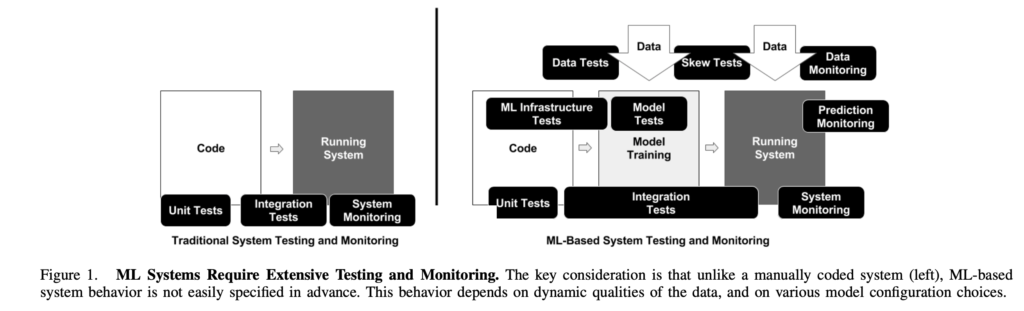

The complete development pipeline includes three essential components, data pipeline, ML model pipeline, and application pipeline. In accordance with this separation we distinguish three scopes for testing in ML systems: tests for features and data, tests for model development, and tests for ML infrastructure.

##Features and Data Tests



*   Data validation: Automatic check for data and features schema/domain.
            a) Action: In order to build a schema (domain values), calculate statistics from the training data. This schema can be used as expectation definition or semantic role for input data during training and serving stages.



*   Features importance test to understand whether new features add a predictive power.
           a) Action: Compute correlation coefficient on features columns.
           b) Action: Train model with one or two features.
           c) Action: Use the subset of features “One of k left out and train a set of different models.
           d) Measure data dependencies, inference latency, and RAM usage for each new feature. Compare it with the predictive power of the newly added features.
           e) Drop out unused/deprecated features from your infrastructure and document it.



*   Features and data pipelines should be policy-compliant (e.g. GDPR). These requirements should be programmatically checked in both development and production environments.
*   Feature creation code should be tested by unit tests (to capture bugs in features).









##Tests for Reliable Model Development

We need to provide specific testing support for detecting ML-specific errors.



*   Testing ML training should include routines, which verify that algorithms make decisions aligned to business objective. This means that ML algorithm loss metrics (MSE, log-loss, etc.) should correlate with business impact metrics (revenue, user engagement, etc.)
           a) Action: The loss metrics – impact metrics relationship, can be measured in small scale A/B testing using an intentionally degraded model.
           b) Further reading: Selecting the Right Metric for evaluating Machine Learning Models.


*   Model staleness test. The model is defined as stale if the trained model does not include up-to-date data and/or does not satisfy the business impact requirements. Stale models can affect the quality of prediction in intelligent software.
          a) Action: A/B experiment with older models. Including the range of ages to produce an Age vs. Prediction Quality curve to facilitate the understanding of how often the ML model should be trained.


*   Assessing the cost of more sophisticated ML models.
          a) Action: ML model performance should be compared to the simple baseline ML model (e.g. linear model vs neural network).



*   Validating performance of a model.
          a) It is recommended to separate the teams and procedures collecting the training and test data to remove the dependencies and avoid false methodology propagating from the training set to the test set .
          b) Action: Use an additional test set, which is disjoint from the training and validation sets. Use this test set only for a final evaluation.

*   Fairness/Bias/Inclusion testing for the ML model performance.
          a) Action: Collect more data that includes potentially under-represented categories.
          b) Action: Examine input features if they correlate with protected user categories.




*   Conventional unit testing for any feature creation, ML model specification code (training) and testing.
*   Model governance testing











##ML infrastructure test



*   Training of the ML models should be reproducible, that means that training the ML model on the same data should produce identical ML models.
            a) Diff-testing relies on deterministic training, which is hard to achieve due to non-convexity of the ML algorithms, random seed generation, or distributed ML model training.
            b) Action: reduce non-determinism.
*   Test ML API usage. Stress testing.
            a) Action: Unit tests to randomly generate input data and training the model for a single optimization step (e.g gradient descent).
            b) Action: Crash tests for model training. The ML model should restore from a checkpoint after a mid-training crash.


*   Test the algorithmic correctness.
            a) Action: Unit test that it is not intended to completing the ML model training but to train for a few iterations and ensure that loss decreases while training.
            b) Avoid: Diff-testing with previously build ML models because such tests are hard to maintain.
*   Integration testing: The full ML pipeline should be integration tested.
            a) Action: Create a fully automated test that regularly triggers the entire ML pipeline. The test should validate that the data and code successfully finish each stage of training and the resulting ML model performs as expected.
            b) All integration tests should be run before the ML model reaches the production environment.


*   Validating the ML model before serving it.
            a) Action: Setting a threshold and testing for slow degradation in model quality over many versions on a validation set.
            b) Action: Setting a threshold and testing for sudden performance drops in a new version of the ML model.
*   ML models are canaried before serving.
           a) Action: Testing that an ML model successfully loads into production serving and the prediction on real-life data is generated as expected.


*   Testing that the model in the training environment gives the same score as the model in the serving environment.
            a) Action: The difference between the performance on the holdout data and the “next­day” data. Some difference will always exist. Pay attention to large differences in performance between holdout and “next­day” data because it may indicate that some time-sensitive features cause ML model degradation.
            b) Action: Avoid result differences between training and serving environments. Applying a model to an example in the training data and the same example at serving should result in the same prediction. A difference here indicates an engineering error.







